<a href="https://colab.research.google.com/github/ali94an/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction of Product Sales

- Author: Ali Abu Nimah

## Project Overview

## Load and Inspect Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSLlanQeBoDAdYP7sLzmidTFSPO7gB7_i_D5mgyzm1brB5T9y8J0NdRnPSKtHcNh6FN6WfnqTbVSiaa/pub?gid=661392125&single=true&output=csv"
df = pd.read_csv(url)

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data

How many rows and columns?

In [6]:
df.shape

(8523, 12)

- There are `8523` rows and `12` columns in our dataset.

Checking the data types

In [7]:
df.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


- `Item_Identifier` would be our index if it has 0 missing values which is likely will be
- All the data types seem good.

Checking for duplicated data

In [8]:
df.duplicated().sum()

0

- Great! We have 0 duplicates.

Checking for missing values

In [9]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


- `Item_Identifier` has 0 missing values and it would be our index.
- Notice that we have 2 columns with missing values which are:
`Item_Weight` and `Outlet_Size`

In [10]:
df = df.set_index("Item_Identifier")

We will put a `place holder` for now for the missing values for both columns that contain missing values.
For `Object Variables` we will put `MISSING` as a place holder and for `Numericals` we will put a `-1` instead.

In [11]:
# Numeric Variable
df['Item_Weight'] = df['Item_Weight'].fillna(-1)
# Object Variable
df['Outlet_Size'] = df['Outlet_Size'].fillna("MISSING")

In [12]:
df.isna().sum()

,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0
Outlet_Type,0


- Just checking to make sure there are no missing values.

Categories data consistency check

In [13]:
# Filtering the categorical variables and saving them in a variable
cat_columns = df.select_dtypes("object").columns
# Inspect the categorical variables
cat_columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [14]:
# Obtain the value counts for each categorical variable
for col in cat_columns:
  print(f"Value counts for {col}")
  print(df[col].value_counts())
  # Empty Line to increase Readability
  print("\n")

Value counts for Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


Value counts for Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


Value counts for Outlet_Identifier
Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64


Value counts for Outlet_Size
Outlet_Size
Medium     2793
MISSING    2410
Sm

- `Item_Fat_Content` has inconsistency values.
- All other variables seem fine.

Let's inspect the `Item_Fat_Content` value counts alone.

In [15]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


- Notice that our values should be:
 - `LF` and `low fat` should be `Low Fat`.
 - `reg` should be as `Regular`.



Let's fix that!

In [16]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({"LF":"Low Fat","low fat":"Low Fat","reg":"Regular"})

In [17]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


- Just checking if it is fixed.

Summary Statistics

In [18]:
df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,10.48,0.07,140.99,1997.83,2181.29
std,6.72,0.05,62.28,8.37,1706.50
min,-1.00,0.00,31.29,1985.00,33.29
25%,6.65,0.03,93.83,1987.00,834.25
50%,11.00,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


- Notice that there is an extreme value for `Item_Outlet_Sales`, which is showing the max of `13086.96`, this could be a mistake.

## Exploratory Data Analysis

In [19]:
# Checking info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8523 entries, FDA15 to DRG01
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 799.0+ KB


### EDA Numeric
- For each numeric feature, we will plot the distribution and a boxplot, except `Outlet_Establishment_Year`.

In [20]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [21]:
def plot_numeric (df,col):
  fig,axes = plt.subplots(nrows=2,figsize=(8,5),sharex=True)
  mean = df[col].mean().round()
  median = df[col].median()
  sns.histplot(data=df,x=col,ax=axes[0])
  axes[0].axvline(mean,label=f'Mean {mean}',color='red',ls='--')
  axes[0].axvline(median,label=f'Median {median}',color='orange',ls='--')
  sns.boxplot(data=df,x=col,ax=axes[1])
  fig.suptitle(f'EDA for {col}')
  plt.tight_layout();
  plt.show();

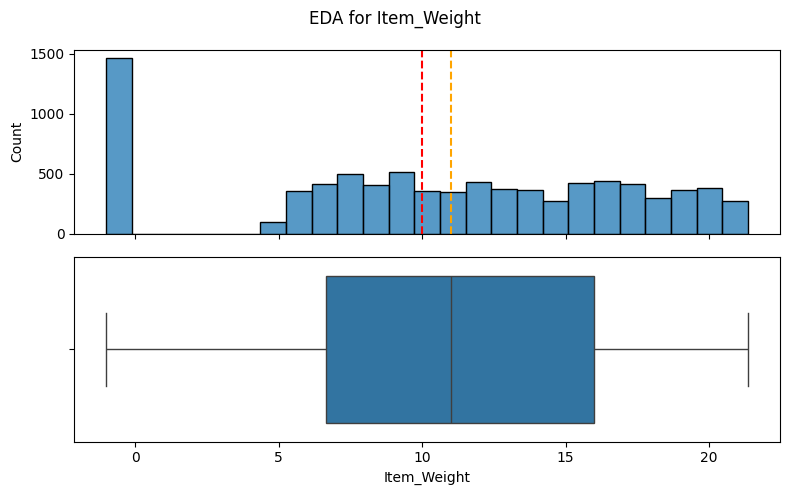

In [22]:
plot_numeric(df,'Item_Weight')

- Because of variety of customer prefernces, we notice that there are different products with different weights so customers choose based on there preference, and note that the data is well distibuted.

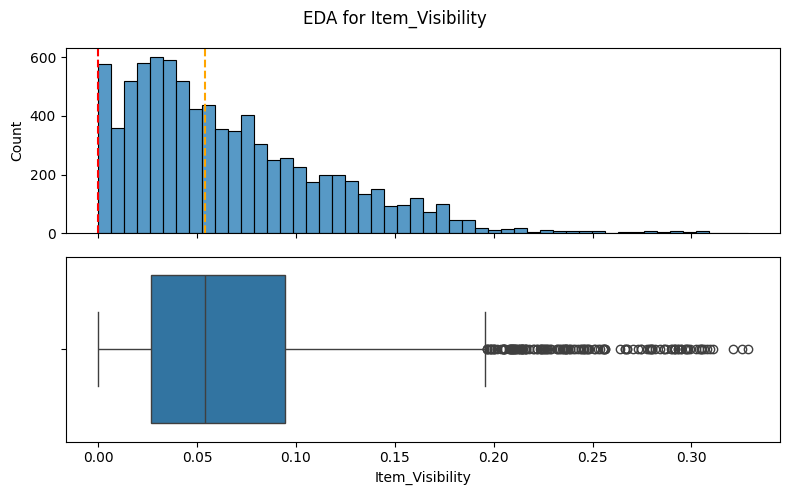

In [23]:
plot_numeric(df,'Item_Visibility')

- We notice variability of our `Item_Visibility` in here, that because of variety of products and there are some outliers which mean that those products are quite poplar more than the others.

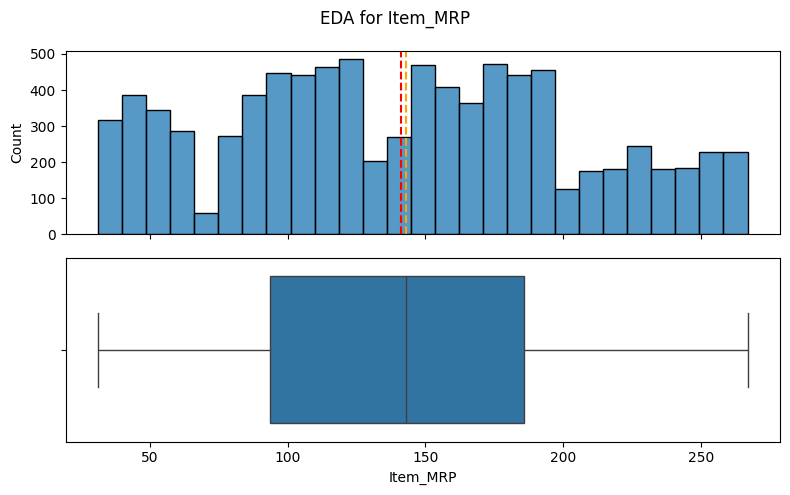

In [24]:
plot_numeric(df,'Item_MRP')

- We notice that the prices are well distributed and most products fall between 100 and 170.

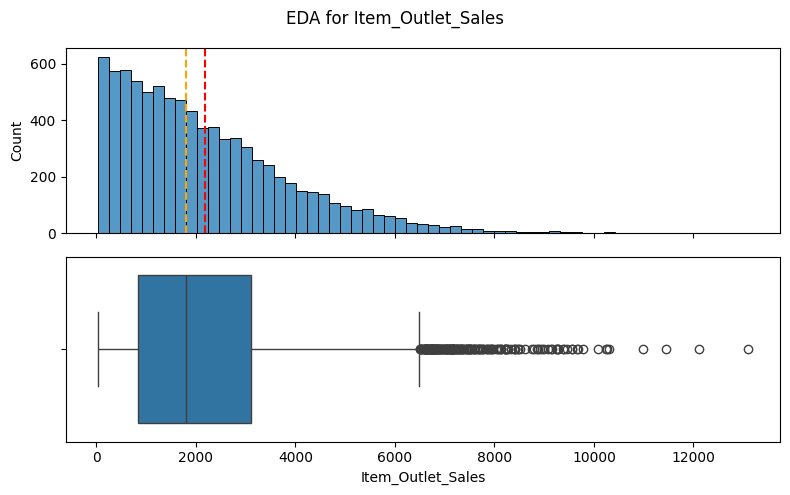

In [25]:
plot_numeric(df,'Item_Outlet_Sales');

- We notice that `Item_Outlet_Sales` is right-skewed distributed and the mean (red-dashed line) is greated than the median (orange-dashed line) which confirms that it is positively skewed, while most sales are low, a few very high sales push the average up.
- From `IQR` in boxplot we notice that most sales are below 6000, there are outliers which should be further analyzed to check if they are valid or real high-sales products.

### EDA Categorical
- For each categorical feature, we will plot the countplot, except `Outlet_Identifier`.

In [26]:
# Checking categorical features again
cat_columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [27]:
def count_plot(df,col):
  ax = sns.countplot(data=df,x=col)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')
  ax.set_title(f'Frequency of {col}')
  plt.show();

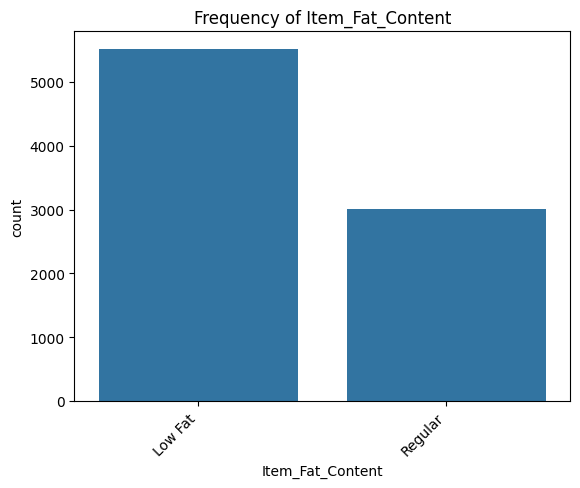

In [28]:
count_plot(df,'Item_Fat_Content')

- Notice Low Fat are bigger which means the products being on sale are targeting customers that are on diet.

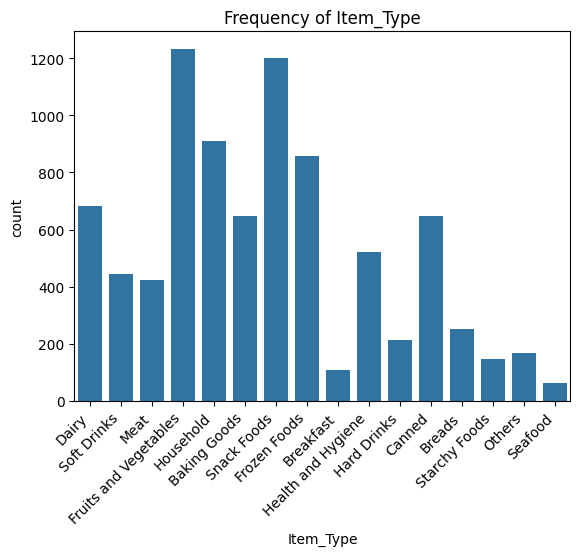

In [29]:
count_plot(df,'Item_Type')

- Notice that "Fruits and Vegetables" and "Snack Foods" are the most items to be on sale which is quite understandable as the most popular type of customers who love snacks and healthy food like fruits and vegetables.

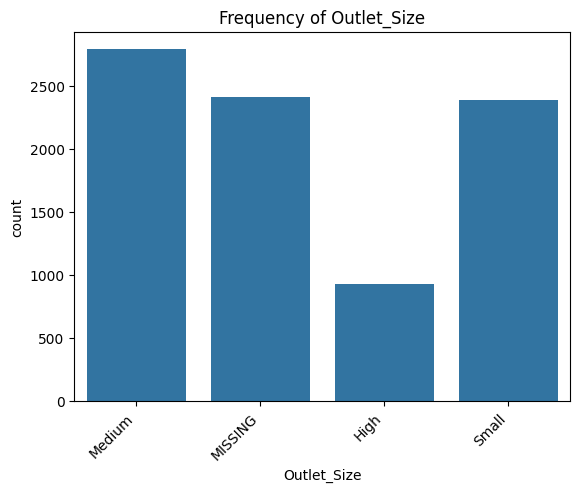

In [30]:
count_plot(df,'Outlet_Size')

- Currently the most is "Medium", but there are a lot of "MISSING" values which could really affect our data when we truely identify it.

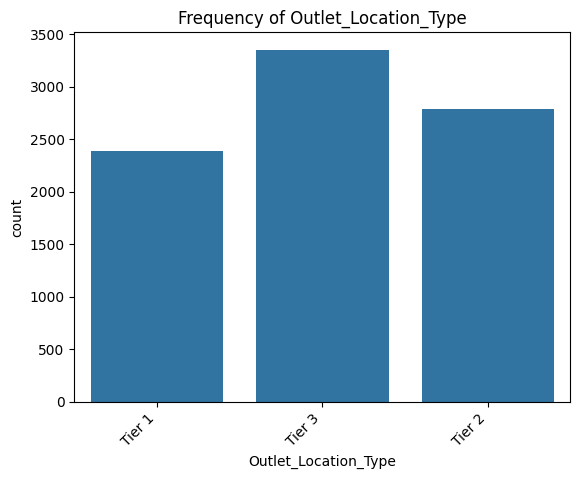

In [31]:
count_plot(df,'Outlet_Location_Type')

- Most of Outlet stores are located in "Tier 3" which could be understandable because of less-traffic and remotely, and could gain more sales.

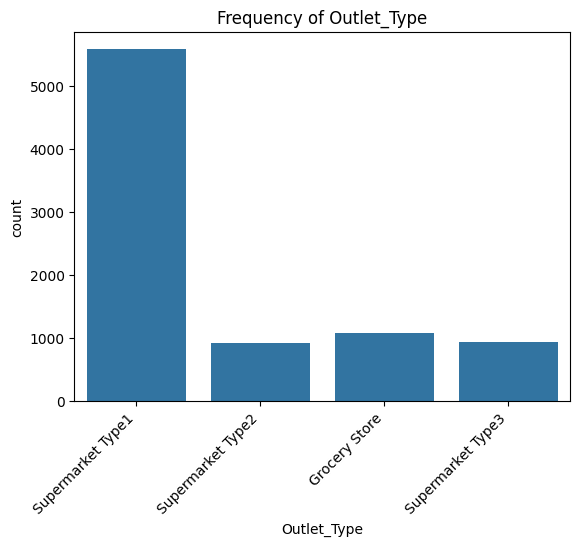

In [32]:
count_plot(df,'Outlet_Type')

- "Supermarket Type1" is the highest one we have so that could be because offers a unique set of products for the customers.

### EDA Correlated Feature

In [33]:
# Get correlation
corr = df.corr(numeric_only=True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.54,-0.06
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.54,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.06,-0.13,0.57,-0.05,1.00


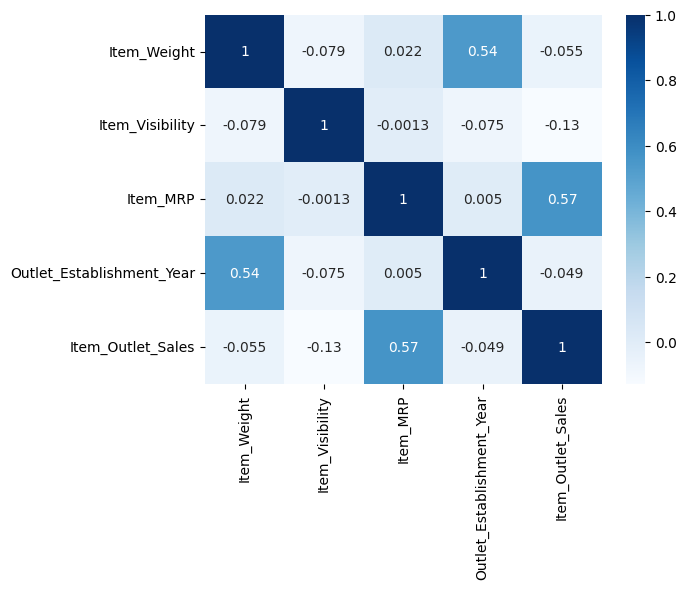

In [34]:
sns.heatmap(corr,annot=True,cmap='Blues');

- Notice that there are "2 Positive Moderate Relationships" which are:
  - `Outlet_Establishment_Year` with `Item_Weight` and it is `0.54`
  - `Item_Outlet_Sales` with `Item_MRP` and it is `0.57`

## Feature Inspection

Replacing placeholders with NaN

In [35]:
# Numeric Variable
df['Item_Weight'] = df['Item_Weight'].replace(-1,np.nan)
# Object Variable
df['Outlet_Size'] = df['Outlet_Size'].replace("MISSING",np.nan)

Checking if we have NaN back

In [36]:
df.isna().sum()

,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0
Outlet_Type,0


### EDA Functions

Explore Numeric

In [37]:
def explore_numeric(df,x,figsize=(6,5)):
  # Making our figure with gridspec for subplots
  gridspec={"height_ratios":[0.7,0.3]}
  fig,axes=plt.subplots(nrows=2,figsize=figsize,sharex=True,gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df,x=x,ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=df,x=x,ax=axes[1])
  ## Adding a title
  axes[0].set_title(f"Column: {x}")
  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()
  ## Print message with info on the count and % of null values
  null_count=df[x].isna().sum()
  null_perc = round((null_count/len(df)*100),2)
  nunique = df[x].nunique()
  val_counts = df[x].value_counts(dropna=False)
  most_common_val = val_counts.index[0]
  freq = val_counts.values[0]
  perc_most_common = round((freq/len(df)*100),2)
  print(f"- NaN's Found: {null_count} ({null_perc}%)")
  print(f"- Unique Values: {nunique}")
  print(f"- Most Common Value: '{most_common_val}' occurs {freq} times ({perc_most_common}%)")

Explore Numeric vs. Target

In [38]:
def plot_numeric_vs_target(df,x,y='Item_Outlet_Sales',figsize=(6,4),**kwargs): # kwargs for sns.regplot
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','linewidths':1,'alpha':0.8}
  sns.regplot(data=df,x=x,y=y,ax=ax,scatter_kws=scatter_kws,**kwargs)# Included the new argument within the sns.regplot function
  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})")
  # Make sure the plot is shown before the print statement
  plt.show()
  return fig, ax

Explore Categorical

In [39]:
def explore_categorical(df,x,fillna=True,placeholder='Missing',figsize=(6,4),order=None):
  temp_df = df.copy()
  null_count = temp_df[x].isna().sum()
  null_perc=round((null_count/len(temp_df)*100),2)
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  fig,ax = plt.subplots(figsize=figsize)
  sns.countplot(data=temp_df,x=x,ax=ax,order=order)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')
  ax.set_title(f'Column: {x}')
  fig.tight_layout()
  plt.show();
  nunique = temp_df[x].nunique()
  val_counts = temp_df[x].value_counts(dropna=False)
  most_common_val = val_counts.index[0]
  freq = val_counts.values[0]
  perc_most_common = round((freq/len(temp_df)*100),2)
  print(f"- NaN's Found: {null_count} ({null_perc}%)")
  print(f"- Unique Values: {nunique}")
  print(f"- Most Common Value: '{most_common_val}' occurs {freq} times ({perc_most_common}%)")
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is constant or quari-constant feature and should be dropped.")
  else: print("- Not Constant or quasi-constant.")
  return fig,ax

Explore Categorical vs. Target

In [40]:
def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Customize the plots
  fig, ax = plt.subplots(figsize=figsize)
# Barplot
  sns.barplot(data=df, x=x, y=y, ax=ax, alpha=0.6, hue=x, order=order,hue_order=order,
            linewidth=1, edgecolor='black', errorbar=None,legend= False
            )
  # Striplot
  sns.stripplot(data=df, x=x, y=y, hue=x, ax=ax,
              order=order, hue_order=order,
              legend=False, edgecolor='white',
              linewidth = 0.5, size=3, zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  plt.show();
  return fig,ax

In [41]:
# Inspecting Numerical Columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [42]:
# Reset the index to create a unique default index
df = df.reset_index()

### Inspecting Item_Weight

**Data Dictionary**
- Item_Weight:	Weight of product

**Univariate Viz**

In [43]:
df['Item_Weight'].dtype

dtype('float64')

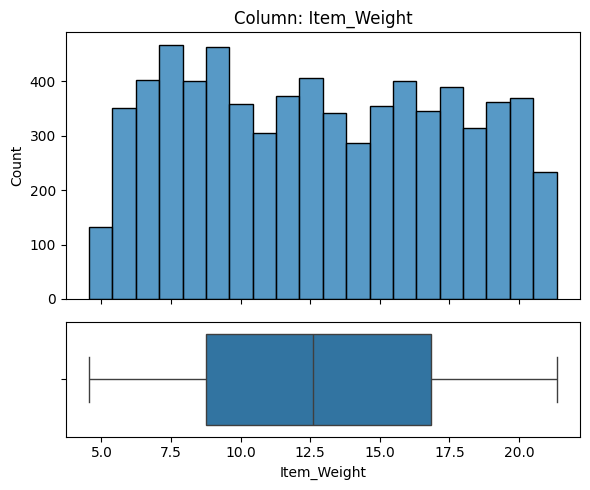

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most Common Value: 'nan' occurs 1463 times (17.17%)


In [44]:
explore_numeric(df,x='Item_Weight')

**Feature Observations**

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric.
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 1463 null values (17.17%).
  - Imputation is recommended, as weight is a key product attribute. Possible strategies:
    - Impute by Item_Type, products of the same category likely have similar weights.
    - Mean or median imputation within product categories.
- Is the feature constant or quasi-constant?
  - No.
- What is the cardinality? Is it high?
  - Not applicable (numeric feature).
- Would we know this BEFORE the target is determined?
  - Yes.
- Is there a business case/understanding reason to exclude based on our business case?
  - No.

**Multivariate Viz**

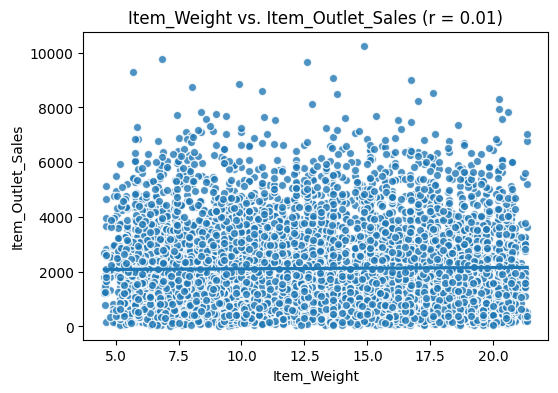

In [45]:
plot_numeric_vs_target(df,x='Item_Weight');

**Feature vs. Target Observations**

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Possibly, I would think the less the item weight, the more the item outlet sales becauese it could effect transportation costs.
- Does this feature appear to be a predictor of the target?
  - No, there is no relationship between the feature and the target (r=0.01).

### Inspecting Item_Visibility

**Data Dictionary**
- Item_Visibility:	The percentage of total display area of all products in a store allocated to the particular product

**Univariate Viz**

In [46]:
df['Item_Visibility'].dtype

dtype('float64')

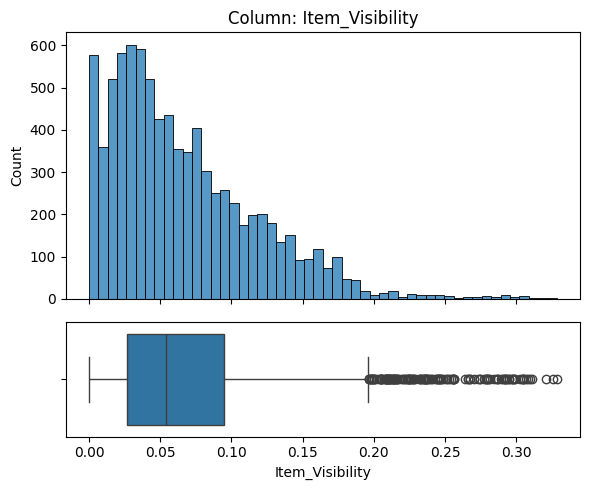

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most Common Value: '0.0' occurs 526 times (6.17%)


In [47]:
explore_numeric(df,x='Item_Visibility')

**Feature Observations**

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric.
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - No explicit null values, but some values might be zero, which could indicate missing or incorrect data.
  - Possible solution: Consider imputing zero values with the median or mean of Item_Visibility within the same product category.
- Is the feature constant or quasi-constant?
  - No.
- What is the cardinality? Is it high?
  - Not applicable (numeric feature).
- Would we know this BEFORE the target is determined?
  - Yes.
- Is there a business case/understanding reason to exclude based on our business case?
  - Possibly, because item visibility might have data quality issues. It should be analyzed further to determine its real impact on sales. If the visibility data is unreliable, it may be better to exclude or transform it.

**Multivariate Viz**

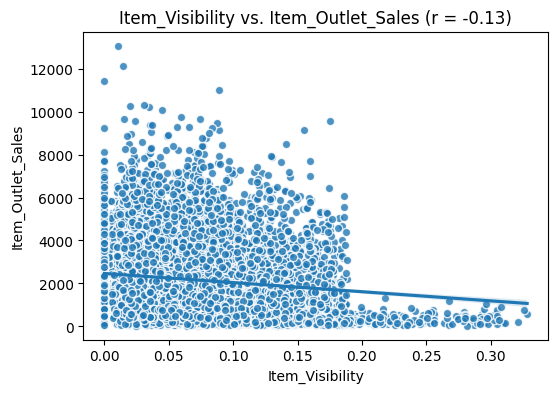

In [48]:
plot_numeric_vs_target(df,x='Item_Visibility');

**Feature vs. Target Observations**

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Possibly, I would think the less the item visiblity, the less the item outlet sales.
- Does this feature appear to be a predictor of the target?
  - Possibliy, there is a negative correlation between the feature and the target (r=-0.13), but as we noted there could be data quality issues specially in range of 0.00 - 0.18.

### Inspecting Item_MRP

**Data Dictionary**
- Item_MRP:	Maximum Retail Price (list price) of the product

**Univariate Viz**

In [49]:
df['Item_MRP'].dtype

dtype('float64')

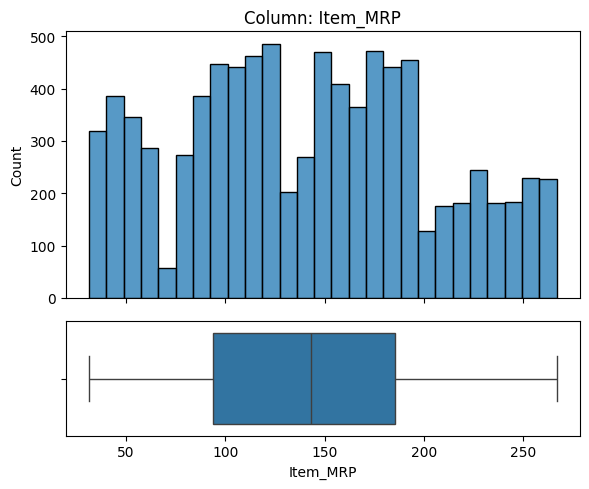

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most Common Value: '172.0422' occurs 7 times (0.08%)


In [50]:
explore_numeric(df,x='Item_MRP')

**Feature Observations**

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric.
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0.0%).
  - No Need to Impute.
- Is the feature constant or quasi-constant?
  - No.
- What is the cardinality? Is it high?
  - Not applicable (numeric feature).
- Would we know this BEFORE the target is determined?
  - Yes.
- Is there a business case/understanding reason to exclude based on our business case?
  - No, Item_MRP is directly related to sales, as pricing affects consumer purchasing behavior. Excluding it could result in loss of a key predictor for sales.

**Multivariate Viz**

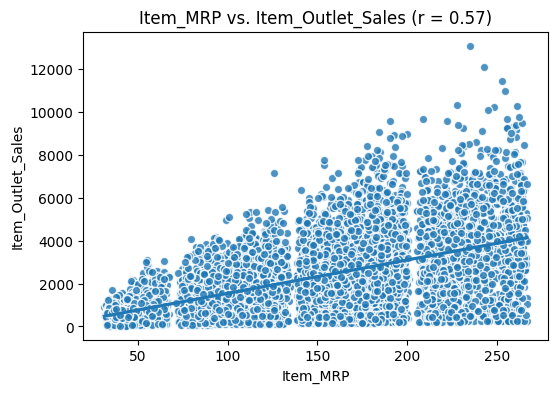

In [51]:
plot_numeric_vs_target(df,x='Item_MRP');

**Feature vs. Target Observations**

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes, I would think the greater the MRP, the higher the item outlet sales.
- Does this feature appear to be a predictor of the target?
  - Yes, there is a positive correlation between the feature and the target (r=0.57).

### Inspecting Item_Fat_Content

**Data Dictionary**
- Item_Fat_Content:	Whether the product is low-fat or regular

**Univariate Viz**

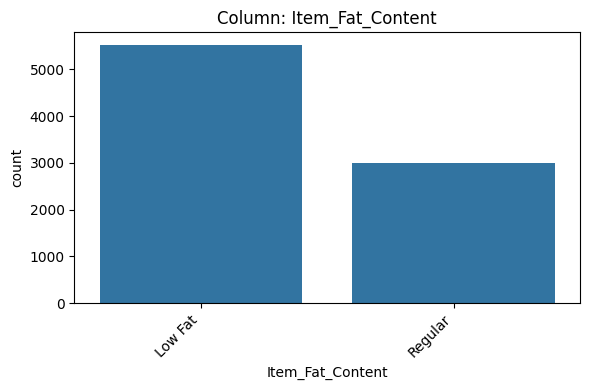

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most Common Value: 'Low Fat' occurs 5517 times (64.73%)
- Not Constant or quasi-constant.


In [52]:
explore_categorical(df,'Item_Fat_Content');

**Feature Observations**

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical (nominal)
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0.0%).
  - No Need to Impute.
- Is the feature constant or quasi-constant?
  - No.
- What is the cardinality? Is it high?
  - There are 2 unique values. This is less than 10, which is our threshold for high cardinality.
- Would we know this BEFORE the target is determined?
  - Yes.
- Is there a business case/understanding reason to exclude based on our business case?
  - No, because it impacts the item outlet sales because of customer preferences based on fat content, but it could have minimal effect compared to other factors.

**Multivariate Viz**

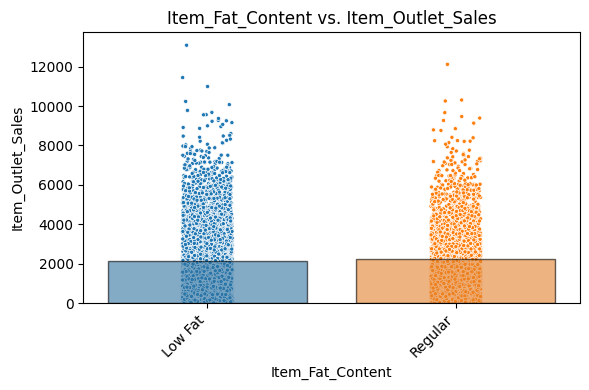

In [53]:
plot_categorical_vs_target(df,'Item_Fat_Content');

**Feature vs. Target Observations**

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Possibly, because of customer preferencess.
- Does this feature appear to be a predictor of the target?
  - No, because the data spread on both values are the same.

### Inspecting Item_Type

**Data Dictionary**
- Item_Type:	The category to which the product belongs

**Univariate Viz**

In [54]:
df['Item_Type'].dtype

dtype('O')

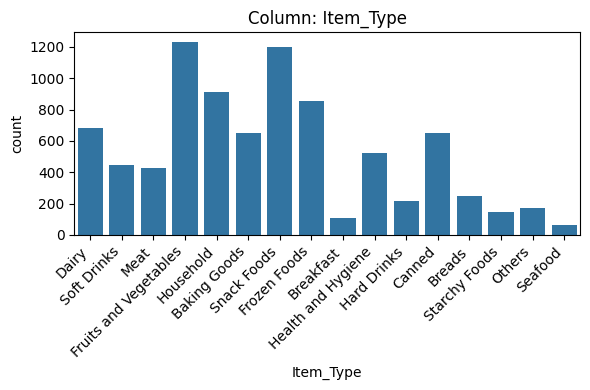

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most Common Value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not Constant or quasi-constant.


In [55]:
explore_categorical(df,'Item_Type');

**Feature Observations**

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical (nominal)
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0.0%).
  - No Need to Impute.
- Is the feature constant or quasi-constant?
  - No.
- What is the cardinality? Is it high?
  - There are 16 unique values. This is more than 10, which is our threshold for high cardinality.
  - This feature may be problematic for modeling due to high cardinality.
- Would we know this BEFORE the target is determined?
  - Yes.
- Is there a business case/understanding reason to exclude based on our business case?
  - No, because it impacts the item outlet sales because of customer preferences based on item type.

**Multivariate Viz**

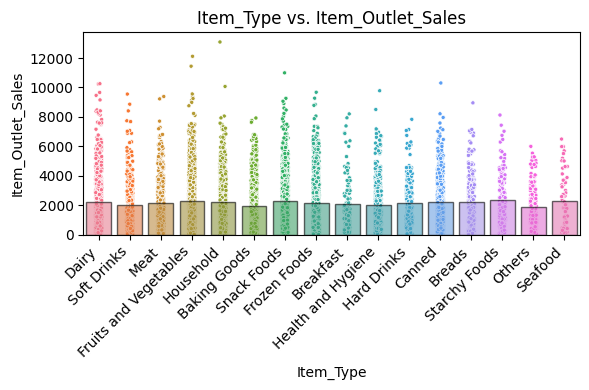

In [56]:
plot_categorical_vs_target(df,'Item_Type');

**Feature vs. Target Observations**

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Possibly, because of customer preferencess.
- Does this feature appear to be a predictor of the target?
  - Possibly, further exploration would make it more clear as there are many types, but the variability across them is not tangible.

### Inspecting Outlet_Size

**Data Dictionary**
- Outlet_Size:	The size of the store in terms of ground area covered

**Univariate Viz**

In [57]:
df['Outlet_Size'].dtype

dtype('O')

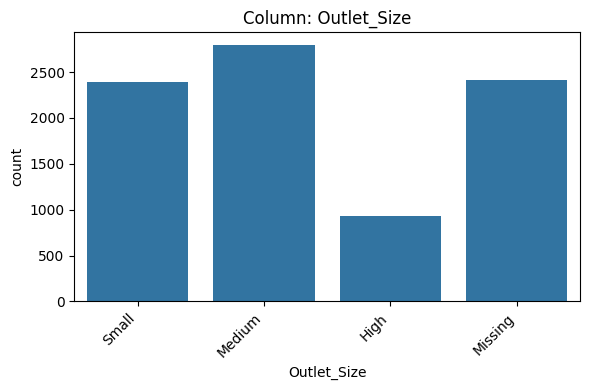

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most Common Value: 'Medium' occurs 2793 times (32.77%)
- Not Constant or quasi-constant.


In [58]:
size_order = ['Small','Medium','High','Missing']
explore_categorical(df,'Outlet_Size',order=size_order);

**Feature Observations**

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Ordinal
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 2410 null values (28.28%).
  - Imputation is recommended because Outlet_Size is likely an important factor in sales (larger outlets may have higher foot traffic and sales).

    Possible strategy:
    - Mode imputation.
- Is the feature constant or quasi-constant?
  - No.
- What is the cardinality? Is it high?
  - There are 3 unique values. This is less than 10, which is our threshold for high cardinality.
- Would we know this BEFORE the target is determined?
  - Yes.
- Is there a business case/understanding reason to exclude based on our business case?
  - Possibly, the retailer can't control the size.

**Multivariate Viz**

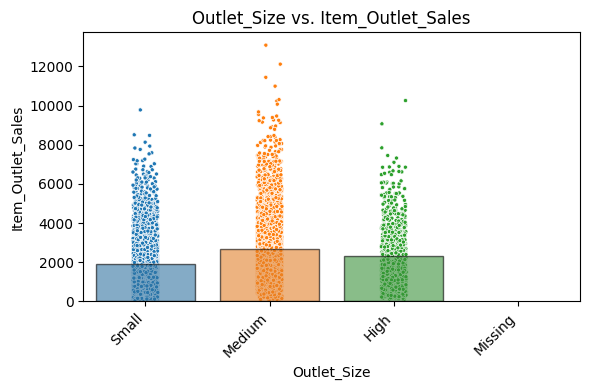

In [59]:
plot_categorical_vs_target(df,'Outlet_Size',order=size_order);

**Feature vs. Target Observations**

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes, the larger outlets may have better inventory and sales volume.
- Does this feature appear to be a predictor of the target?
  - Possibly, the larger it gets the more sales it gains, the difference between mediumn and high isn't that tangible but could be because of missing values.

In [60]:
# Inspecting Categorical Columns
cat_columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

### Inspecting Outlet_Location_Type

**Data Dictionary**
- Outlet_Location_Type:	The type of area in which the store is located

**Univariate Viz**

In [61]:
df['Outlet_Location_Type'].dtype

dtype('O')

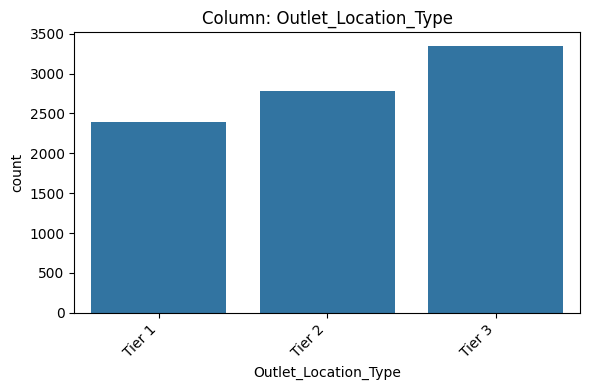

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most Common Value: 'Tier 3' occurs 3350 times (39.31%)
- Not Constant or quasi-constant.


In [62]:
loc_order = ['Tier 1','Tier 2','Tier 3']
explore_categorical(df,'Outlet_Location_Type',order=loc_order);

**Feature Observations**

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Ordinal
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0.0%).
  - No Need to Impute.
- Is the feature constant or quasi-constant?
  - No.
- What is the cardinality? Is it high?
  - There are 3 unique values. This is less than 10, which is our threshold for high cardinality.
- Would we know this BEFORE the target is determined?
  - Yes.
- Is there a business case/understanding reason to exclude based on our business case?
  - Possibly, the retailer can't control the location.

**Multivariate Viz**

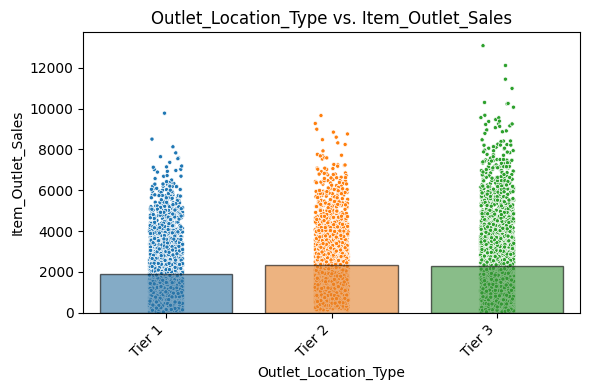

In [63]:
plot_categorical_vs_target(df,'Outlet_Location_Type',order=loc_order);

**Feature vs. Target Observations**

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Possibly, the lower tier, more sales, because outlet sales usually are located in low tiers.
- Does this feature appear to be a predictor of the target?
  - Possibly, because as we see when tier is lower it has more sales.

### Inspecting Outlet_Type

**Data Dictionary**
- Outlet_Type:	Whether the outlet is a grocery store or some sort of supermarket

**Univariate Viz**

In [64]:
df['Outlet_Type'].dtype

dtype('O')

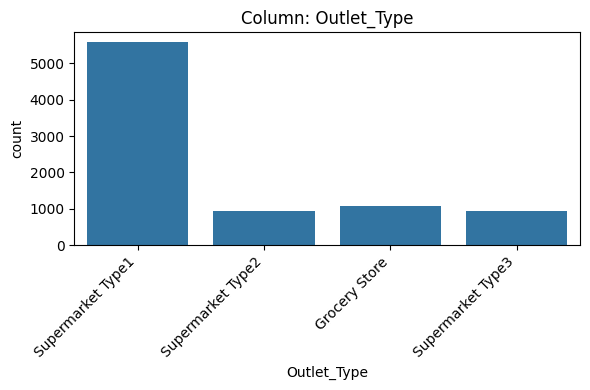

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most Common Value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not Constant or quasi-constant.


In [65]:
explore_categorical(df,'Outlet_Type');

**Feature Observations**

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Ordinal
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0.0%).
  - No Need to Impute.
- Is the feature constant or quasi-constant?
  - No.
- What is the cardinality? Is it high?
  - There are 4 unique values. This is less than 10, which is our threshold for high cardinality.
- Would we know this BEFORE the target is determined?
  - Yes.
- Is there a business case/understanding reason to exclude based on our business case?
  - Possibly, the retailer can't control the location.

**Multivariate Viz**

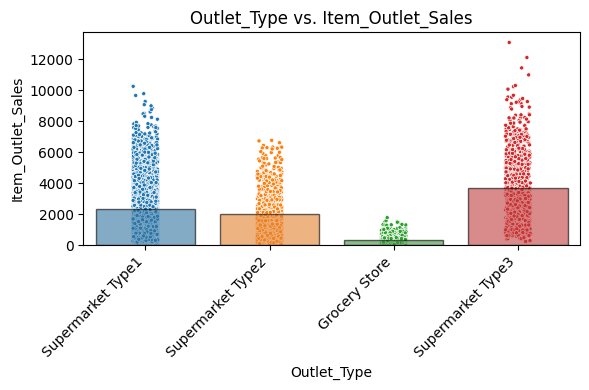

In [66]:
plot_categorical_vs_target(df,'Outlet_Type');

**Feature vs. Target Observations**

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Possibly, because maybe each type has different volumes, sizes or utilities
- Does this feature appear to be a predictor of the target?
  - Yes, because we notice variability across values, and supermarket is better than grocery store.

### Inspecting Outlet_Outlet_Sales

**Data Dictionary**
- Outlet_Outlet_Sales: Sales of the product in the particular store.

**Univariate Viz**

In [67]:
df['Item_Outlet_Sales'].dtype

dtype('float64')

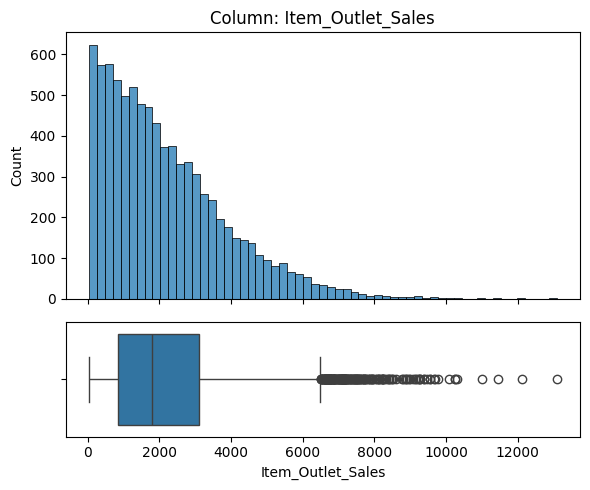

- NaN's Found: 0 (0.0%)
- Unique Values: 3493
- Most Common Value: '958.752' occurs 17 times (0.2%)


In [68]:
explore_numeric(df,x='Item_Outlet_Sales')

**Feature Observations**

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric.
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0.0%).
  - No Need to Impute.
- Is the feature constant or quasi-constant?
  - No.
- What is the cardinality? Is it high?
  - Not applicable (numeric feature).
- Would we know this BEFORE the target is determined?
  - Yes.
- Is there a business case/understanding reason to exclude based on our business case?
  - Yes, this our target variable.